In [4]:
import pickle
import pandas as pd
import os
df = pd.read_pickle('data/trainingData.pkl')



In [ ]:
# Install xgboost and libomp (for Mac OSX) before importing xgboost
%pip install xgboost


In [ ]:

import sys
import os
if sys.platform == "darwin":
	# Check if libomp is installed, if not, install it using Homebrew
	if os.system("brew --version") == 0:
		os.system("brew install libomp")
	else:
		print("Please install Homebrew and run 'brew install libomp' in your terminal.")

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Prepare features and target
X = df.drop(columns=['preis_miet_best'])
y = df['preis_miet_best']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("Predictions:", y_pred[:10])

Note: you may need to restart the kernel to use updated packages.
Homebrew 4.4.31


==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:fd162df7a06190ee800a9e6afd28f4466d33548821a480ba043cd927b44d60f7
######################################################################## 100.0%                                                             4.5%
==> Pouring portable-ruby-3.4.4.arm64_big_sur.bottle.tar.gz
==> Homebrew collects anonymous analytics.
Read the analytics documentation (and how to opt-out) here:
  https://docs.brew.sh/Analytics
No analytics have been recorded yet (nor will be during this `brew` run).

==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
abpoa
act_runner
add-de

==> Downloading https://ghcr.io/v2/homebrew/core/libomp/manifests/20.1.7
==> Fetching libomp
==> Downloading https://ghcr.io/v2/homebrew/core/libomp/blobs/sha256:70e6da25205323438aaadfb030b49d439c188ab188cc57e6eff055352395df1d
==> Pouring libomp--20.1.7.arm64_sequoia.bottle.tar.gz
==> Caveats
libomp is keg-only, which means it was not symlinked into /opt/homebrew,
because it can override GCC headers and result in broken builds.

For compilers to find libomp you may need to set:
  export LDFLAGS="-L/opt/homebrew/opt/libomp/lib"
  export CPPFLAGS="-I/opt/homebrew/opt/libomp/include"
==> Summary
🍺  /opt/homebrew/Cellar/libomp/20.1.7: 9 files, 1.7MB
==> Running `brew cleanup libomp`...
Disable this behaviour by setting HOMEBREW_NO_INSTALL_CLEANUP.
Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> `brew cleanup` has not been run in the last 30 days, running now...
Disable this behaviour by setting HOMEBREW_NO_INSTALL_CLEANUP.
Hide these hints with HOMEBREW_NO_ENV_HINTS (see 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note: you may need to restart the kernel to use updated packages.


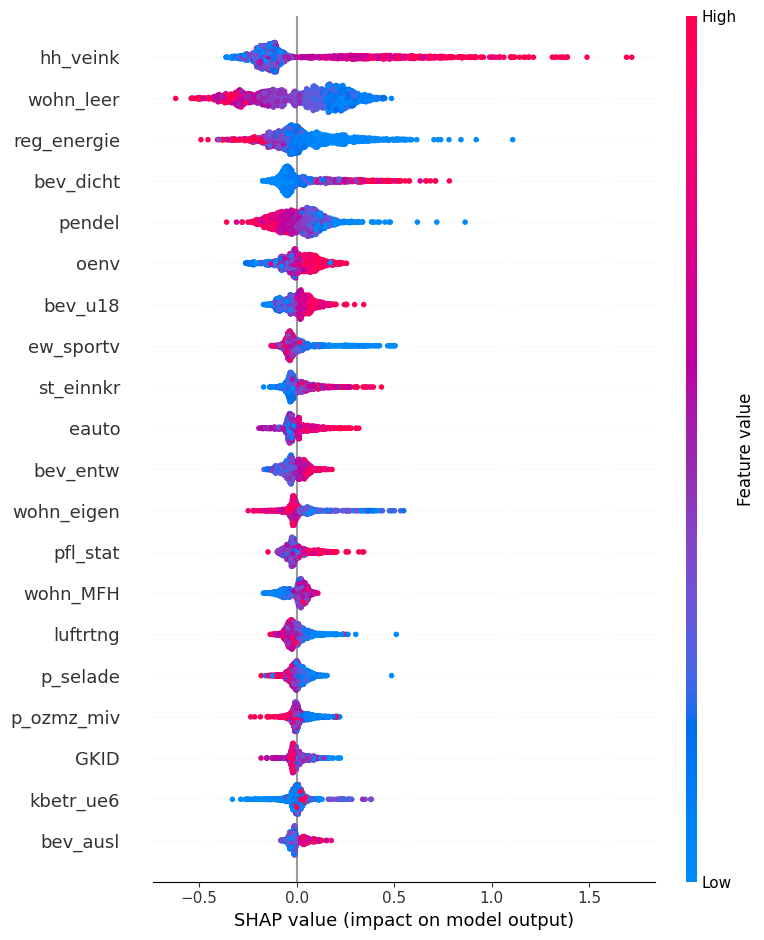

In [10]:
import shap

# Install SHAP if not already installed
%pip install shap

import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()